<h2><center>NLP Text Classification</h2>

## I. Introduction

### 1.1 Domain-specific area
This project provides an analysis of textual data on Twitter to accurately detect and classify sentiment trends regarding elections in India using sentiment analysis techniques. This would provide government bodies and political parties with a tool that takes in a corpus of text for training to analyse the sentiment of tweets and assist in decision-making.

### 1.2 Objectives

### 1.3 Dataset
To begin this project, an extensive amount of textual data corpora is required. After researching large datasets of Tweets, Twitter Sentiment Dataset on Kaggle was proven to be the best for this project. With 163 thousand tweets extracted using the Twitter API, the authors have categorised each tweet to have either a positive, neutral or negative sentiment, which is beneficial for the algorithm in categorising harmful texts.

The dataset consists of the clean_text (defined as the Tweets that do not have redundant information) and the sentiment of the tweet.

### 1.4 Evaluation methodology

## II. Implementation

### 2.1 Preparation of dataset

#### Acquiring dataset
The dataset on the collection of Tweets were acquired from Kaggle by downloading the CSV file. The author of this dataset is Saurabh Shahane. The code for importing the dataset is shown below:

#### Importing libraries
- **pandas library** was imported to process and handle datasets in Python. It is used to help write and read from CSV files while handling real-world messy data and processing them into a proper format

- **numpy library** was imported to handle calculations and use numpy arrays for statistical calculations

- **matplotlib library** was imported to plot the data and represent it graphically

- **os library** was imported to have a way of using the operating system dependent functionalities, more specifically to save the dataset as a CSV

- **stopwords library** was imported to have a library of the most common words in data to aid in stopwords removal

- **collections.Counter library** is a dictionary subclass that counts the frequency of elements. This helps to check for additional common words being used

- **ast library** was imported to convert a string that looked like a list to an actual list

- **WordNetLemmatizer library** was imported to perform lemmatisation on words. It reduces words to its base or dictionary form, known as the lemma

- **nltk.corpus library** was used to access contents of a diverse set of corpora

In [35]:
# The following block of code was self-written
# dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# text processing and analysis
import nltk
from nltk.corpus import stopwords
# analysing text corpora
from collections import Counter

# modifying string to list
import ast
# stemming and lemmatisation
from nltk.stem import WordNetLemmatizer
# regular expressions
import re

# lexical analysis
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#### Helper function
As the dataset will be saved at each section for easier access to the CSV based on each progressive step, the saving step will be changed to a function.

In [36]:
# The following block of code was self-written
def save_to_csv(df,file_path):
    if not os.path.exists(file_path):
        df.to_csv(file_path, index = False)
        print('File saved successfully.')
    else:
        print('File already exists.')

#### Importing dataset
To check that the dataset is ready for cleaning and analysis, we will look at the first entry to check if there are headers. Since there are headers, and the dataset contains only relevant information, the text, and sentiment, the headers will just be modified to "tweet" and "sentiment" for better comprehension.

In [37]:
# The following block of code was self-written
df = pd.read_csv('datasets/Twitter_Data_Sentiments.csv', nrows = 1)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1


In [38]:
# The following block of code was self-written
tweets_df = pd.read_csv('datasets/Twitter_Data_Sentiments.csv')
tweets_df.columns = ['tweet', 'sentiment']
tweets_df.head()

,tweet,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


### 2.2 Pre-processing
Completed steps:
- Removing NaN, infinite and duplicated entries
- Reducing sample size, storing locally
- Pre-processing (basic text processing)
    - Removal of stop words + tokenisation + Regex
    - Frequency distribution (removal of additional stop words)
    - Lemmatisation
    - Lexical diversity + frequency distribution
    
(writeup not needed)

TO DO LIST:
- Convert/store the dataset locally and preprocess the data [**done**]
- Describe the text representation (e.g., bag of words, word embedding, etc.) [**not done**]
- any pre-processing steps you have applied and why they were needed (e.g. tokenisation [**done**], lemmatization [**done**])
- Describe the vocabulary and file type/format, e.g. CSV file. [**not done**]

#### Removing NaN or infinite entries
To ensure that the dataset contains only required information, we will check and remove any entries that contain missing or infinite values.

#### Removing duplicated entries
To ensure that the analysis is beneficial, all entriesshould be unique. A 'duplicated' column will be added to the a temporary copy of the dataset which is the output of the duplicated() function and we will print only columns where the 'duplicated' column is True. Based on the output, it is seen that there are no duplicated Tweets.

#### Reducing sample size
To address computational constraints and the imbalanced nature of the dataset (positives to negatives having an approximate ratio of 2:1), the analysis will be limited to a subset of 1000 instances for each sentiment category.
Due to the limitations of computer capacity and the imbalanced nature of the dataset, we will limit the analysis to a subset of 1000 instances for each sentiment category.

<b>The following blocks of code was self-written with references</b>
<br>checking for duplicates: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
<br>creation of sample from large dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [39]:
# The following block of code was self-written
sentiments = tweets_df['sentiment'].value_counts(dropna = False)
infinites = np.isinf(tweets_df['sentiment']).sum()
sentiments['Infinite'] = infinites
print("sentiments before cleaning:\n\n", sentiments)

# Removing NaN values
tweets_df.dropna(inplace = True)
# Replacing and removing infinite values
tweets_df.replace([np.inf, -np.inf], np.nan, inplace = True)
tweets_df.dropna(inplace = True, axis = 0)

sentiments before cleaning:

 sentiment
1.0         72250
0.0         55213
-1.0        35510
NaN             7
Infinite        0
Name: count, dtype: int64


In [40]:
# The following block of code was self-written
dupe_checker = tweets_df.copy()
duplicates = dupe_checker.duplicated()
dupe_checker['duplicated'] = duplicates
duplicated = dupe_checker[dupe_checker['duplicated'] == True]
duplicated

,tweet,sentiment,duplicated


In [41]:
# The following block of code was self-written
# Storing 1000 entries of each sentiment
positives = tweets_df[tweets_df['sentiment'] == 1].sample(n = 1000, random_state = 10)
neutrals = tweets_df[tweets_df['sentiment'] == 0].sample(n = 1000, random_state = 10)
negatives = tweets_df[tweets_df['sentiment'] == -1].sample(n = 1000, random_state = 10)

# Concatenating the 3 sentiments together
sampled_tweets_df = pd.concat([positives, neutrals, negatives])
# Resetting index
sampled_tweets_df.reset_index(drop = True, inplace = True)
print('positive sentiments:', sampled_tweets_df[sampled_tweets_df['sentiment'] == 1].shape[0])
print('neutral sentiments:', sampled_tweets_df[sampled_tweets_df['sentiment'] == 0].shape[0])
print('negative sentiments:', sampled_tweets_df[sampled_tweets_df['sentiment'] == -1].shape[0])

positive sentiments: 1000
neutral sentiments: 1000
negative sentiments: 1000


The tweets_df will now be saved into a new dataset for easier accessibility. To ensure that no duplicates are saved, a simple path checking will be used.

In [42]:
# The following block of code was self-written
filename = 'datasets/sample3000_Twitter_Data_Sentiments.csv'
save_to_csv(sampled_tweets_df ,filename)
tweets_df = pd.read_csv(filename)

File already exists.


#### Basic text processing
To begin the process of analysing the text, we would require conducting the following basic text processing methods:
- Removal of stop words + tokenisation + Regex
- Frequency distribution (removal of additional stop words)
- Lemmatisation
- Lexical diversity + frequency distribution

- **Removing stop words**: In human language, it is very common for stop words to be present. These words, including **determiners** (eg: the, a, this, my), **conjunctions** (eg: and, or, nor, but, whereas) and **prepositions** (eg: against, along, at, before), are used to connect thoughts and speech to form grammatically accurate sentences or structural cohesion. While important during communication amongst one another, they do not carry importance or sentiments that would be valuable to this project, thus introducing noise. The removal would help to streamline the process to focus on words that would contribute more meaning to the sentiment of Tweets.

* tokenisation will be done in lowercase as all stopwords are in lowercase.

- **Regular expression (Regex)**: To ensure that the analysis is only on alphabetical inputs, the use of Regex will remove all non-alphabetical characters.

In [43]:
# The following block of code was self-written
# Downloading stopword corpus
nltk.download('stopwords')
# Get stopword list
stop_words = set(stopwords.words('english'))

# Checking removal works on a test text
test_tweet = 'This is a test that Stopword removal works.'

tokens = test_tweet.lower().split()
# Removing each token if part of stop_words
filtered_tokens = [token for token in tokens if token not in stop_words]
print("Filtered from", len(tokens), "to", len(filtered_tokens))

Filtered from 8 to 4


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbgka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The following commented out code was the original self-written code that now is not being used.
<br>It was modified to aid in the stemming and lemmatisation in the next section

In [44]:
# The following block of code was self-written
tweets = tweets_df['tweet'].tolist()

filtered_tweets = []
for tweet in tweets:
    tokens = tweet.lower().split()
    # Removing each token if part of stop_words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_tweets.append(filtered_tokens)

tweets_df['filtered_tweet'] = filtered_tweets
tweets_df.head()

,tweet,sentiment,filtered_tweet
0,infinity cant chased two nations theory has be...,1.0,"[infinity, cant, chased, two, nations, theory,..."
1,years dynamic modi rule and fear losing electi...,1.0,"[years, dynamic, modi, rule, fear, losing, ele..."
2,terrorists pakistan want lose opposition win m...,1.0,"[terrorists, pakistan, want, lose, opposition,..."
3,the entire panel opposition panel what can exp...,1.0,"[entire, panel, opposition, panel, expect, deb..."
4,theres one disgustinggundaghaleezghatyascum yo...,1.0,"[theres, one, disgustinggundaghaleezghatyascum..."


#### Regular expression
removes any non alphabeticals

<b>The following block of code was self-written with reference</b>
<br>using lambda: https://www.w3schools.com/python/python_lambda.asp

In [45]:
# The following block of code was self-written
# Removing all non alphabetical tokens
def clean_text_input(text):
    cleaned_text = re.sub(r'\b\d+\b\s*', '', text)
    return cleaned_text.strip()

print(clean_text_input('testing that 200000 is removed'))

# Apply cleaning to each row of 'filtered_tweet'
tweets_df['filtered_tweet'] = tweets_df['filtered_tweet'].apply(lambda tokens: [token for token in tokens if token.isalpha()])

testing that is removed


The removal of stopwords has reduced the texts. Due to the dataset chosen having the column named as "clean_text", as well as the analysis from the above output having highly unique text, the text will now be examined.

#### Frequency distribution
By making use of the **collections.Counter library**, it would allow the most used words to be displayed. Due to the word "modi" being seen 2831/3000 times, this would be considered a stop word. Words containing the substring "modi" will be removed from all entries to ensure that all representations of this stop word would not be part of the analysis.

<b>The following blocks of code was self-written with reference</b>
<br>collections library: https://www.digitalocean.com/community/tutorials/python-counter-python-collections-counter

In [46]:
# The following block of code was self-written
# Concatenate all tokenised words together
tokenised_words = [word for tweet in tweets_df['filtered_tweet'] for word in tweet]
# Count word frequency
word_counts = Counter(tokenised_words)

# Displays top 10 used words and their frequencies
most_used_words = word_counts.most_common(5)
for word, count in most_used_words:
    print(f"{word}: {count}")

modi: 2831
india: 499
bjp: 253
congress: 231
people: 230


In [47]:
# The following block of code was self-written
# Iterating through rows to check for target word
for index, row in tweets_df.iterrows():
    tweet_words = row['filtered_tweet']
    tweet_words = [word for word in tweet_words if 'modi' not in word]
    tweets_df.at[index, 'filtered_tweet'] = tweet_words

# Check that stopword "modi" is not part of frequently used words
tokenized_words = [word for tweet in tweets_df['filtered_tweet'] for word in tweet]
word_counts = Counter(tokenized_words)
most_used_words = word_counts.most_common(5)
for word, frequency in most_used_words:
    print(f"{word}: {frequency}")

india: 499
bjp: 253
congress: 231
people: 230
like: 222


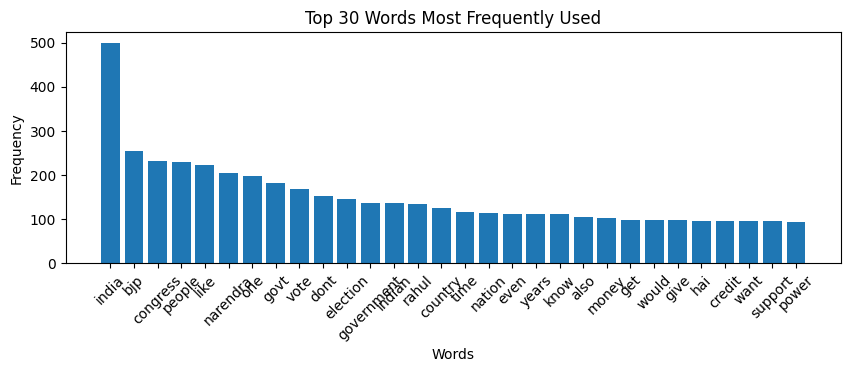

In [48]:
# The following block of code was self-written
# Get top 30 most used words
most_used_words = word_counts.most_common(30)
# Extract the words and their frequencies
words, frequencies = zip(*most_used_words)

# Plot the word frequencies
plt.figure(figsize=(10, 3))
plt.bar(words, frequencies)

# Labelling and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Most Frequently Used')
# Rotate x-axis labels if needed
plt.xticks(rotation = 45)
plt.show()

In [49]:
# The following block of code was self-written
filename = 'datasets/tokenised_Twitter_Data_Sentiments.csv'
save_to_csv(tweets_df, filename)
tweets_df = pd.read_csv(filename)

File already exists.


#### Lemmatisation
The first step before lemmatisation is to ensure that the input is a string, as the column filtered_tweets seem to be a string looking like a list, we would have to resolve that issue before starting lemmatisation.

** writeup on lemmatisation

<b>The following blocks of code was self-written with reference</b>
<br>literal_eval: https://docs.python.org/3/library/ast.html
<br>understanding lemmatisation: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

In [50]:
# The following block of code was self-written
# Initialize lemmatiser
lemmatizer = WordNetLemmatizer()

# Iterate through the rows of the dataframe
for index, row in tweets_df.iterrows():
    set_of_words = row['filtered_tweet']
    
    # Convert the set of words into a string
    word_list = ' '.join(set_of_words)
    word_list = word_list.replace(' ', '')
    word_list = ast.literal_eval(word_list)
    word_string = ' '.join(word_list)
    
    # Perform lemmatization on the stemmed string
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_string.split()]
    lemmatized_string = ' '.join(lemmatized_words)
    
    # Update the dataframe with the lemmatized string
    tweets_df.at[index, 'lemmatized_tweet'] = lemmatized_string
    
tweets_df.head()

,tweet,sentiment,filtered_tweet,lemmatized_tweet
0,infinity cant chased two nations theory has be...,1.0,"['infinity', 'cant', 'chased', 'two', 'nations...",infinity cant chased two nation theory practic...
1,years dynamic modi rule and fear losing electi...,1.0,"['years', 'dynamic', 'rule', 'fear', 'losing',...",year dynamic rule fear losing election compell...
2,terrorists pakistan want lose opposition win m...,1.0,"['terrorists', 'pakistan', 'want', 'lose', 'op...",terrorist pakistan want lose opposition win in...
3,the entire panel opposition panel what can exp...,1.0,"['entire', 'panel', 'opposition', 'panel', 'ex...",entire panel opposition panel expect debate co...
4,theres one disgustinggundaghaleezghatyascum yo...,1.0,"['theres', 'one', 'disgustinggundaghaleezghaty...",there one disgustinggundaghaleezghatyascum tah...


In [51]:
# The following block of code was self-written
filename = 'datasets/cleaned_Twitter_Data_Sentiments.csv'
save_to_csv(tweets_df, filename)
tweets_df = pd.read_csv(filename)

File saved successfully.


#### Removing NaN entries
As Regex and stop words removal can cause entries to be invalid, the removal of NaN entries will be done.

In [52]:
# The following block of code was self-written
nan_entries = tweets_df[tweets_df.isna().any(axis = 1)]
print("Before cleaning:\n", nan_entries)
tweets_df.dropna(inplace = True)
nan_entries = tweets_df[tweets_df.isna().any(axis = 1)]
print("\nAfter cleaning:\n", nan_entries)

Before cleaning:
                  tweet  sentiment filtered_tweet lemmatized_tweet
1625         modi has         0.0             []              NaN
1881  modi with you @         0.0             []              NaN

After cleaning:
 Empty DataFrame
Columns: [tweet, sentiment, filtered_tweet, lemmatized_tweet]
Index: []


#### Lexical diversity
Lexical analysis is used as a metric to measure the variety or richness of the vocabulary used in a text corpora. This helps to gain understanding to the complexity of the data being used.

$$\text{Lexical Diversity} = \frac{\text{Total Number of Unique Words}}{\text{Total Number of Words}}$$

Based on the output, the language used in both positive and negative sentiments is slightly less diverse compared to the neutral sentiments. However, since the difference is minute, it would suggest that the vocabulary used and linguistic complexity are similar across all sentiments. This is a valid statement as the dataset consists of already modified tweets by the owner of the dataset.

In [54]:
# The following block of code was self-written
positive_sentiments = tweets_df[tweets_df['sentiment'] == 1]
neutral_sentiments = tweets_df[tweets_df['sentiment'] == 0]
negative_sentiments = tweets_df[tweets_df['sentiment'] == -1]

positive_tokens = positive_sentiments['lemmatized_tweet'].str.split()
neutral_tokens = neutral_sentiments['lemmatized_tweet'].str.split()
negative_tokens = negative_sentiments['lemmatized_tweet'].str.split()

def calc_lexicalDiversity(tokens):
    # Exclude empty string from tokens
    tokens = [token for token in tokens if token]
    # Counts all tokens
    total_tokens = sum(len(token) for token in tokens)
    # Creates set of unique tokens
    unique_tokens = set(token for sublist in tokens for token in sublist)
    # Counts set of unique tokens
    unique_total_tokens = len(unique_tokens)
    return unique_total_tokens / total_tokens

positive_lexical_diversity = calc_lexicalDiversity(positive_tokens)
neutral_lexical_diversity = calc_lexicalDiversity(neutral_tokens)
negative_lexical_diversity = calc_lexicalDiversity(negative_tokens)

print("positive lexical diversity:", positive_lexical_diversity)
print("neutral lexical diversity:", neutral_lexical_diversity)
print("negative lexical diversity:", negative_lexical_diversity)

positive lexical diversity: 0.3224769359798714
neutral lexical diversity: 0.39214576731552736
negative lexical diversity: 0.32126580653443737


#### Text representation
- **Bag of Words (BoW)**: 
- **Term Frequency-Inverse Document Frequency (TF-IDF)**: 

<b>The following blocks of code was self-written with heavy reference</b>
<br>BoW: https://machinelearningmastery.com/gentle-introduction-bag-words-model/
<br>TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [84]:
# The following block of code was self-written
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
# Fit the vectorizer to 'lemmatized_tweet' column
vectorizer.fit(tweets_df['filtered_tweet'])
# Transform the 'lemmatized_tweet' column into BoW matrix
bow_matrix = vectorizer.transform(tweets_df['filtered_tweet'])
# Convert the BoW matrix to array
bow_array = bow_matrix.toarray()

# Print feature names (words)
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:", feature_names)
# Print BoW matrix
print("Bag-of-Words Matrix:")
print(bow_array)

## Second method that would have same output:
#corpus = tweets_df['lemmatized_tweet'].values.tolist()
## Create an instance of CountVectorizer
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(corpus)
#vectorizer.get_feature_names_out()

Feature Names: ['aab' 'aacha' 'aache' ... 'चमन' 'लगभग' 'समझ']
Bag-of-Words Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [87]:
# The following block of code was self-written
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Fit the vectorizer to 'lemmatized_tweet' column
vectorizer.fit(tweets_df['filtered_tweet'])
# Transform the 'lemmatized_tweet' column into TF-IDF matrix
tfidf_matrix = vectorizer.transform(tweets_df['filtered_tweet'])
# Convert the TF-IDF matrix to array
tfidf_array = tfidf_matrix.toarray()

# Print feature names (words)
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:", feature_names)
# Print BoW matrix
print("TF-IDF Matrix:")
print(tfidf_array)

## Second method that would have same output:
#corpus = tweets_df['lemmatized_tweet'].values.tolist()
## Create an instance of TfidfVectorizer
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(corpus)
#vectorizer.get_feature_names_out()

Feature Names: ['aab' 'aacha' 'aache' ... 'चमन' 'लगभग' 'समझ']
TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 2.3 Baseline performance
(writeup not needed)

### 2.4 Classification approach
(writeup not needed)

### 2.5 Coding style
(writeup not needed)

## III. Conclusions

### 3.1 Evaluation

### 3.2 Summary and conclusions

## Temporary reference list
* to use citation generator

- 